In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggQle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv
/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv


In [3]:
import pandas as pd

p1 = '/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv'
p2 = '/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv'

In [4]:
df1=pd.read_csv(p1)
df2=pd.read_csv(p2)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [7]:
target="stress_level"
X=df1.drop(columns=[target])
y=df1[target]

In [8]:
print(y.value_counts(normalize=True))

stress_level
0    0.339091
2    0.335455
1    0.325455
Name: proportion, dtype: float64


In [9]:
cat_cols=[c for c in X.columns if X[c].dtype == 'object']
num_cols=[c for c in X.columns if c not in cat_cols]
print(f"The catogorical values are : {cat_cols} \nThe Numerical values are : {num_cols}")

The catogorical values are : [] 
The Numerical values are : ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [12]:
logreg = Pipeline([
    ('sc', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, n_jobs=-1))
])

In [13]:
logreg.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('clf', LogisticRegression(max_iter=2000, n_jobs=-1))])

In [14]:
pred=logreg.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.8818181818181818


In [16]:
print("Macro-F1:", f1_score(y_test, pred, average='macro')) 

Macro-F1: 0.8819553543691475


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.92      0.91        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Confusion Matrix:
 [[63  5  6]
 [ 3 66  3]
 [ 7  2 65]]


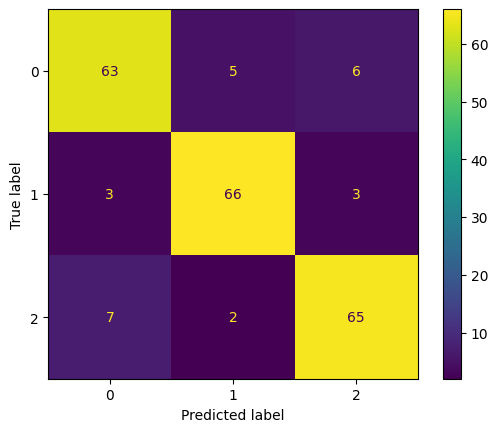

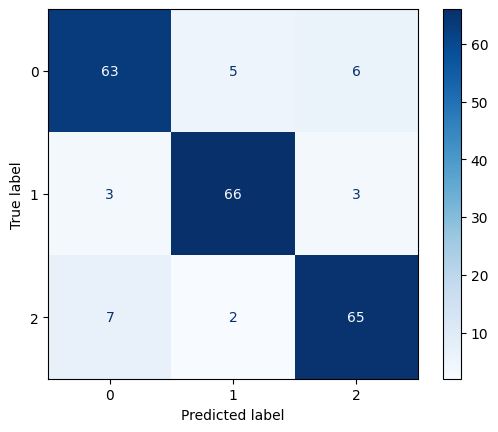

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred)  
disp.plot(cmap='Blues')

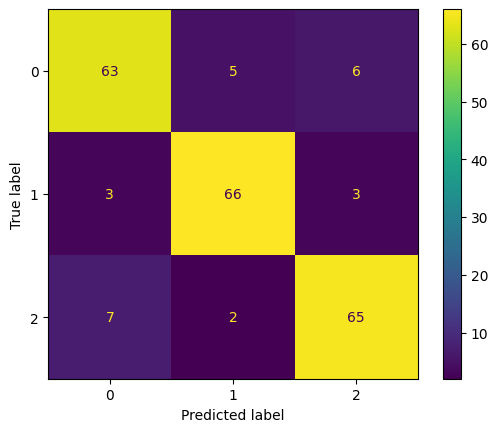

In [20]:
labels = sorted(set(y_test) | set(pred))
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred, labels=labels, display_labels=labels)

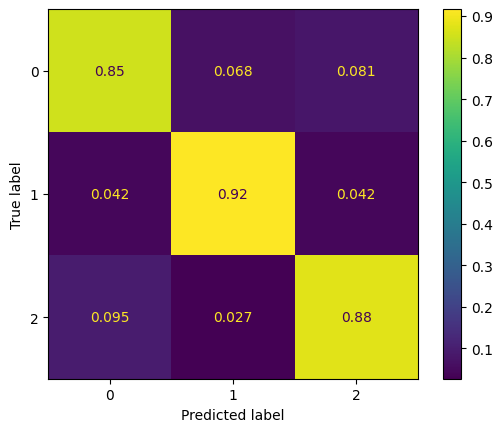

In [21]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize='true')

In [22]:
_cols = X.columns.tolist()

In [69]:
# capture training feature order once
_cols = X.columns.tolist()  # exact names from the DataFrame used at fit time [1]

# optional mapping if incoming keys differ (leave empty if you already use exact names)
key_map = {
    # 'Academic_Pressure': 'academic_performance',
    # 'Anxiety': 'anxiety_level',
    # ...
}

label_map = {
    0: "Low stress",
    1: "Medium stress",
    2: "High stress — consider seeing a psychologist"
}

def predict_stress_level(model, new_data: dict):
    """
    model: fitted Pipeline (e.g., logreg)
    new_data: dict of {training_feature_name: numeric_value}
    returns: {'code': 0/1/2, 'label': str}
    """
    import pandas as pd
    import numpy as np

    if not isinstance(new_data, dict):
        raise TypeError("new_data must be a dict of {feature_name: value}")  # [1]

    # rename incoming keys to training names if needed
    if key_map:
        new_data = {key_map.get(k, k): v for k, v in new_data.items()}  # [1]

    # one-row DataFrame
    df_new = pd.DataFrame([new_data])

    # add missing training columns as 0; drop extras; enforce exact order
    for c in _cols:
        if c not in df_new.columns:
            df_new[c] = 0
    df_new = df_new[_cols]  # exact order, no trailing bracketed numbers here [1]

    # numeric coercion
    df_new = df_new.apply(pd.to_numeric, errors='coerce').fillna(0)  # [2]

    # predict scalar label
    pred = model.predict(df_new)
    if isinstance(pred, (list, np.ndarray)):
        pred = pred
    if isinstance(pred, np.generic):
        pred = pred.item()  # [2]

    return {"code": int(pred), "label": label_map.get(int(pred), f"Class {pred}")}  # [2]


In [72]:
sample = {
    'anxiety_level': 2,
    'self_esteem': 3,
    'mental_health_history': 1,
    'depression': 1,
    'headache': 0,
    'blood_pressure': 1,
    'sleep_quality': 6,
    'breathing_problem': 0,
    'noise_level': 2,
    'living_conditions': 2,
    'safety': 1,
    'basic_needs': 1,
    'academic_performance': 7,
    'study_load': 3,
    'teacher_student_relationship': 2,
    'future_career_concerns': 2,
    'social_support': 2,
    'peer_pressure': 1,
    'extracurricular_activities': 1,
    'bullying': 0
}
print("The Stress Level is :")
print(predict_stress_level(logreg, sample))
# -> {'code': 1, 'label': 'Medium stress'}


The Stress Level is :
{'code': 1, 'label': 'Medium stress'}


/tmp/ipykernel_36/2507116770.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return {"code": int(pred), "label": label_map.get(int(pred), f"Class {pred}")}  # [2]
